In [1]:
import matplotlib as mpl
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# The Laplacian and Curvature #

A deep and beautiful problem in geometry is trying to quantify the curvature of the graph of a smooth function of two variables. This problem traditionally lies within vast subject of differential geometry, one whose answer elucidates a profound distinction between instrisic and extrinsic aspects of surfaces, however answering it will offer a new direct geometric interpretation of the Laplacian. Hence in this section we make a short digression to briefly discuss these ideas with no differential geometric formalism. Simply equip yourself with the recollection of the multivariable Taylor theorem from advanced calculus. 

When one first encounters the definition of the Laplacian operator, it may seem quite convoluted: $\triangle = \mathrm{div} \circ \mathrm{grad}$. It already takes a bit of pictoral effort to digest what each of these operations does to vector and scalar fields respectively. What does it mean to compose these effects? An experimentally inclined mathematician might try plotting a few scalar fields with their laplacians adjacently:

In [2]:
cmap = mpl.cm.get_cmap('Spectral')
fig = plt.figure(figsize = (7,7))
x = np.linspace(-1,1,1000)
y = np.linspace(-1,1,1000)
X,Y = np.meshgrid(x,y)
Z = 1-np.sin(2*np.pi*np.sqrt(X**2+Y**2))/(2*np.pi*np.sqrt(X**2+Y**2))
#plt.contourf(X,Y,Z,cmap=cmap)
#plt.xlabel(r'$x$',fontsize = 22)
#plt.ylabel(r'$y$',fontsize = 22)
#plt.title(r'$u(x,y) = 1-\sin{\left(2\pi \sqrt{x^2+y^2}\right)}/\left(2\pi \sqrt{x^2+y^2}\right)$', fontsize = 25, y = 1.08)
#plt.colorbar()

/Users/nathanielleitao/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/nathanielleitao/anaconda/lib/python3.5/site-packages/numpy/ma/core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


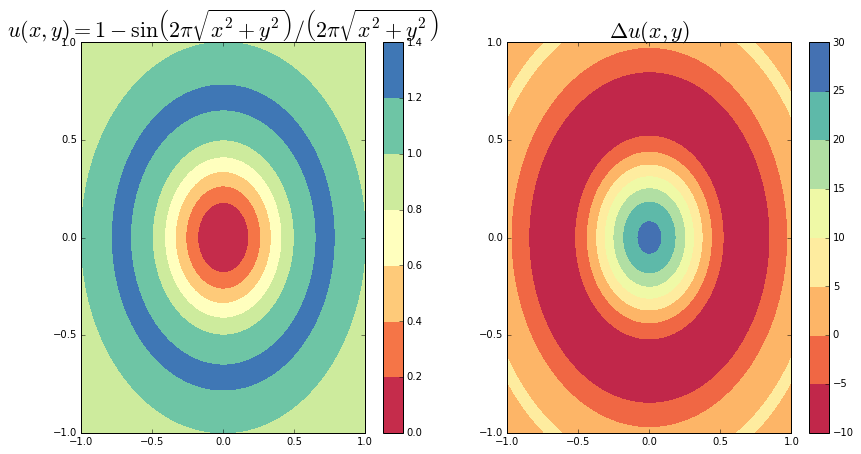

In [3]:
fig, axarr = plt.subplots(1,2,figsize = (14,7))

Z2 = np.cos(2*np.pi*np.sqrt(X**2+Y**2))/(X**2+Y**2)+(-1+4*np.pi**2*(X**2+Y**2))*np.sin(2*np.pi*np.sqrt(X**2+Y**2))/(2*np.pi*(X**2+Y**2)**(3/2))


im0= axarr[0].contourf(X,Y,Z,cmap=cmap)

im1 = axarr[1].contourf(X,Y,Z2,cmap=cmap)

axarr[0].set_title(r'$u(x,y) = 1-\sin{\left(2\pi \sqrt{x^2+y^2}\right)}/\left(2\pi \sqrt{x^2+y^2}\right)$')
axarr[0].title.set_size(22)

axarr[1].set_title(label= r'$\Delta u(x,y)$')
axarr[1].title.set_size(22)


fig.colorbar(im0,ax=axarr[0])
fig.colorbar(im1,ax=axarr[1])

It seems that minima of our scalar field, $u(x,y)$ are peaks of $u$'s Laplacian. Similarly, maxima of the scalar field are mapped to minima via the Laplacian. In other words, the values of $(x,y)$ at which $u$ curve upwards or downwards, are translated into peaks of $u$'s laplacian. This is a very handwavy analogy thus far, so lets be more quantitative. 

Suppose that $u(x,y)$ obtains a local a minima of 0 at the origin, $u(0,0)=0$. Applying Taylors theorem by expanding about the origin gives,
    \begin{align}
    u(\mathbf{x}) &= u(\mathbf{0}) + \nabla u^{T}(\mathbf{0})\mathbf{x} + \frac{1}{2} \mathbf{x}^{T} H[u](\mathbf{0}) \mathbf{x}+O(|\mathbf{x}|^3)\\
    &= \frac{1}{2}\left(u_{xx}(0,0) x^2 + 2u_{xy}(0,0) xy + u_{yy}(0,0) y^2 \right) + O((x^2+y^2)^{3/2}),
    \end{align}
where $H[u](\mathbf{0})$ is the **Hessian matrix** of second derivatives of u evaulated at the origin. 

The behaviour of our function around this point is thus dictated by the matrix $H[u](\mathbf{0})$ and its eigenvalues. Henceforth we will dispense with notating the point $\mathbf{0}$ and assume we are only considering this local minima. In fact, one can show that for any $2 \times 2$ matrix, the eigenvalues are determined by the formula,
    \begin{align}
    \lambda_{\pm} &= \frac{1}{2}\left( \text{Tr}\{H[u]\} \pm \sqrt{ \left(\text{Tr}\{H[u]\} \right)^2 - 4 \det{\{H[u]\}} } \right)\\
        &= \frac{1}{2}\left( \triangle u \pm \sqrt{ \left(\triangle u \right)^2 - 4 \det{\{H[u]\}}} \right).\\
    \end{align}

At this local minima, these eigenvalues of the Hessian define the **principal curvatures** of the surface described by $u$ at the origin. Note that upon some thought, this aligns nicely with our intuition from single variable calculus; namely that the concavity of a graph is described by the second derivative. Hence we can generalize to infer that the curvature of a surface is described by the amplitudes of the principal quadratic approximation to its local minima. We should note that curvature away from minima is a little more nuanced and requires further formalism. Search the "Shape operator" on Wikipedia/Mathematica. Although, there is similar way to compute it based on this special case method of computation. See excercise ____________. 

The **mean curvature**, $H$, is defined to be simply the average of the principal curvatures, which at the minimum of the graph $u(x,y)$ have the form,
    \begin{align}
         H &= \frac{1}{2}\left( \lambda_{+} + \lambda_{-} \right)\\
            &= \frac{1}{4}\left(\left(\triangle u + \sqrt{ \left(\triangle u \right)^2 - 4 \det{H[u]}} \right)+ \left(\triangle u - \sqrt{ \left(\triangle u \right)^2 - 4 \det{H[u]}}\right) \right)\\
      &= \frac{1}{2}\triangle u.
    \end{align}

As advertised, the mean curvature is indeed proportional to the Laplacian of our function at local minima. However, as was already alluded to, the concept of curvature is actually quite a nuanced one. Indeed, one may already ask why taking the mean of the principal curvatures is the correct/useful quantity to study. Indeed, why not study quantities like 
    \begin{equation}
    \lambda_{+}\lambda_{-}, \qquad \left( \frac{1}{\lambda_{+}}+\frac{1}{\lambda_{-}} \right)^{-1}, \qquad \lambda_{+}^3 + \lambda_{-}^3?
    \end{equation}

In fact, the first quantity is what is known as the **Gauss curvature**, $K := \lambda_+ \lambda_-$ which no longer has a direct connection with the Laplacian, but is arguably an even more fundamental description of curvature than the mean. To understand the key differences between mean and Gauss curvature, one needs to understand how surfaces transform under different **embeddings**. The key difference between the two (loosely speaking) is that in a sense the Guass curvature is independent of how we visualize the surface. If we were to keep all distances between points on our surface locally identical but change the (embedding) space in which the surface resides, the gaussian curvature will be invariant but the mean curvature will take on different values. Hence we differentiate the two by saying that Guass curvature is **intrinsic** to the surface while the mean curvature is **extrinsic.** In other words, if you were an ant living on the surface you would only ever be able to measure the Gauss curvature. The mean curvature is only available for compuation to those living in the embedding space. 

As a concrete example, examine the torus which can be interpreted (defined) as a cartesian product of two rings. By a ring, I mean  $\{\mathbf{x} \in \mathbf{R}^2 : |\mathbf{x}|=1\}$ Indeed, imagine taking a large single ring and glueing several rings of a smaller radius to each point on the original ring. You will get the boundary of a donut! Note however that you can very naturally embed this space in $\mathbf{R}^4$ as $\{\mathbf{x}=(x_1,x_2,y_1,y_2) \in \mathbf{R}^4 : x_1^2+x_2^2 = 1, y_1^2+y_2^2 = 1\}$ instead of this "extrinscally curved" embedding in $\mathbf{R}^3$, and with more differential geometric machinery you can show that this intersection of cylinders in $\mathbf{R}^4$ is locally flat. Or alternatively, we can realize the torus as the quotient $\mathbf{R}^2/ \mathbf{Z}^2$ identifying points on the plane differing by standard unit vector. (Try taking a piece of paper and identifying opposing edges with tape. You will again get a donut!) The intrinsic flatness is thus inherited from the plane. In conclusion, the curvature in $\mathbf{R}^3$ is only present because of our inability to see in 4 dimensional space!

## Excercise ##

The relatively simple computation done in this section provides all the necessary intuition to generalize our definitions of princple, mean and Gauss curvatures to other points on the graph of $u$ which don't happen to be local extrema. Finding planes tangent to a general point on the graph (x,y,u(x,y)), we can use the same techniques discussed here by rotating into a frame in which this tangent plane becomes the new horizontal (x,y) plane. Show by redefining $u$ in this new frame that the general form of the mean curvature its graph is,
    \begin{equation}
        H = \frac{1}{2\sqrt{1+\nabla u^{T} \nabla u}}\left( \triangle u - \frac{\nabla u^{T} H[u] \nabla u}{1+\nabla u^{T} \nabla u}\right)
    \end{equation}